# Load Data In

In [ ]:
train <- read.csv(file = '/train.csv')
test <- read.csv(file = '/test.csv')

In [ ]:
# 0 mean dead
# 1 means alive

# Look at the first 6 rows of data for train and test

In [ ]:
head(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [ ]:
dim(train)

[1] 891  12

In [ ]:
head(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [ ]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [ ]:
table(train$Sex)


female   male 
   314    577 

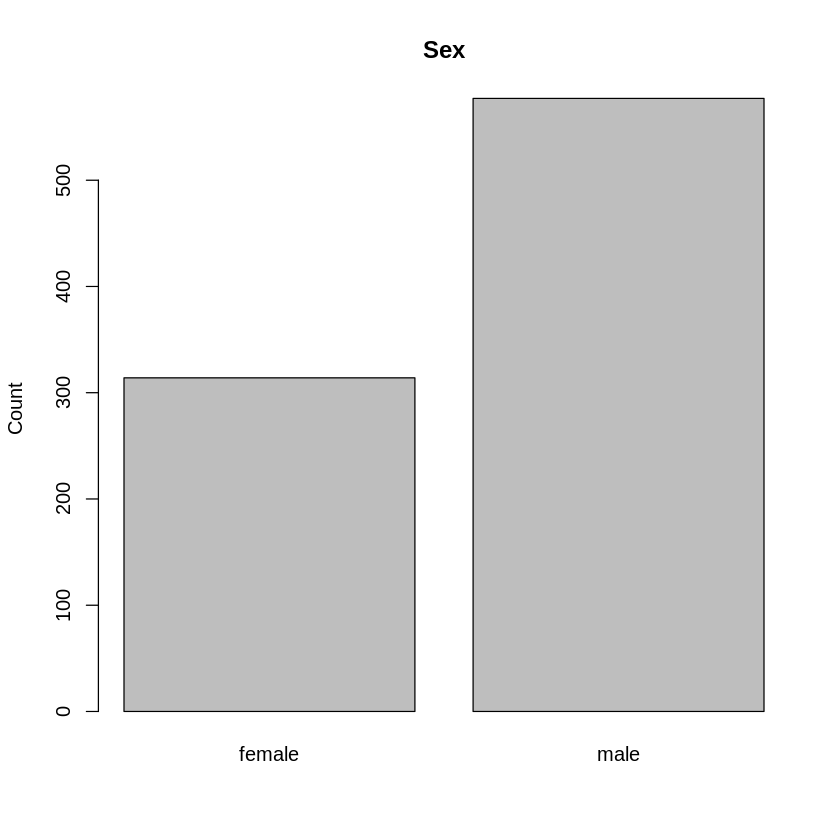

In [ ]:
barplot(table(train$Sex), ylab = 'Count', main = 'Sex')

In [ ]:
table(train$Pclass)


  1   2   3 
216 184 491 

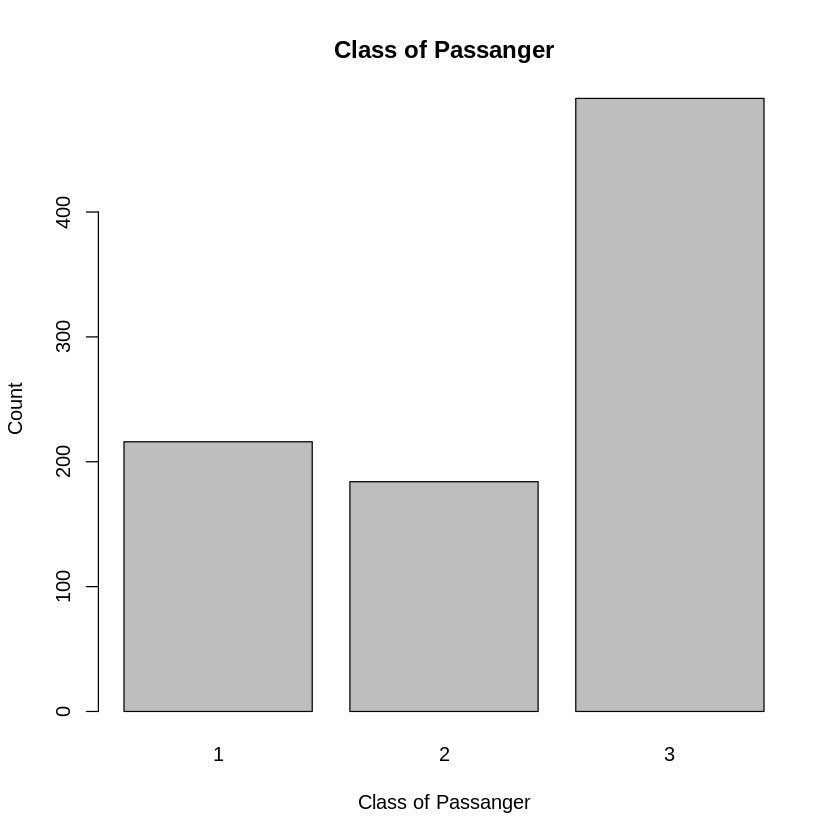

In [ ]:
barplot(table(train$Pclass), xlab = 'Class of Passanger', ylab = 'Count', main = 'Class of Passanger')

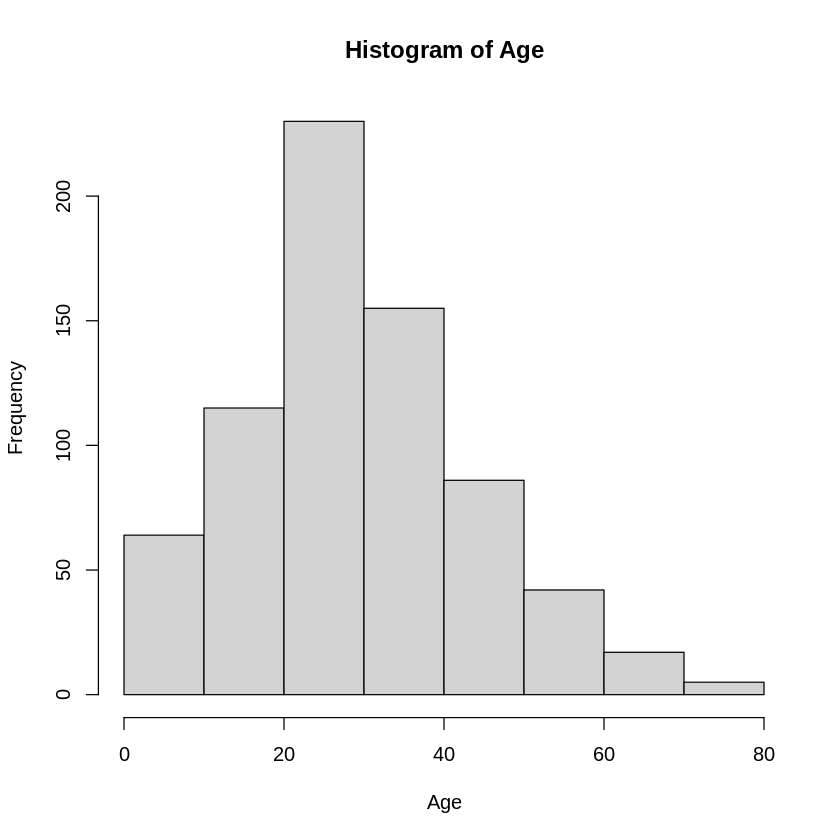

In [ ]:
hist(train$Age, xlab = 'Age', main = 'Histogram of Age')

In [ ]:
table(train$Survived)


  0   1 
549 342 

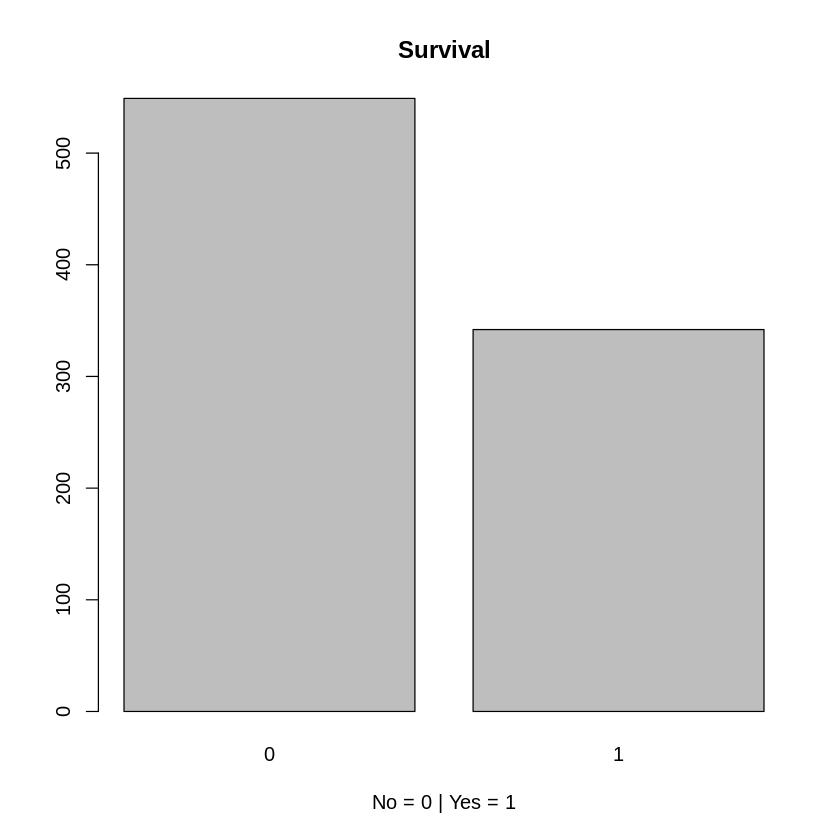

In [ ]:
barplot(table(train$Survived), xlab = ' No = 0 | Yes = 1 ', main = 'Survival')

In [ ]:
table(train$Sex, train$Survived)

        
           0   1
  female  81 233
  male   468 109

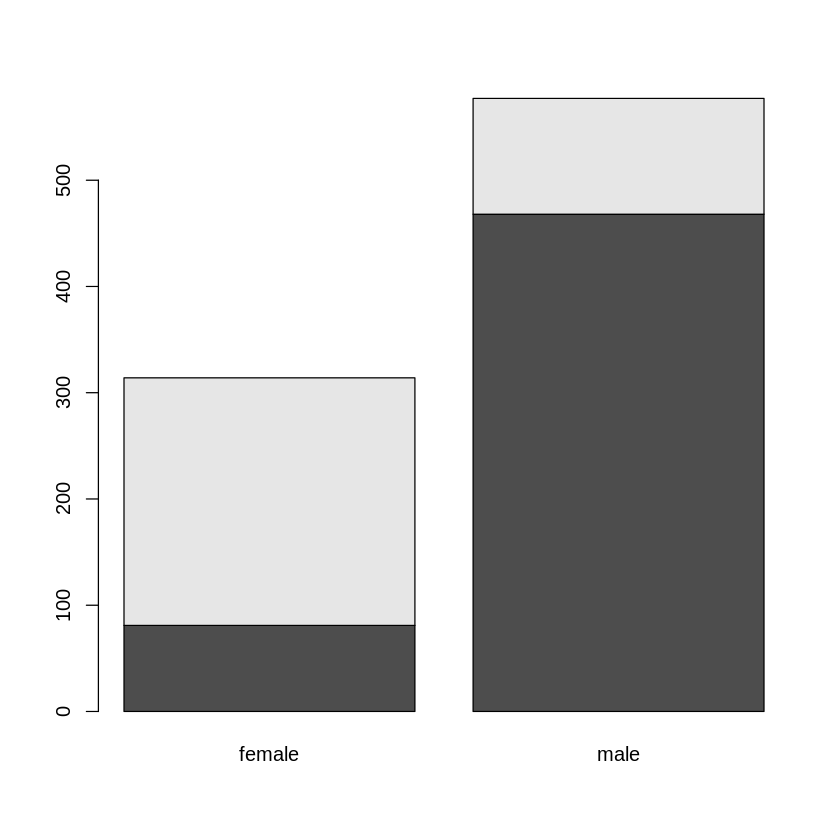

In [ ]:
barplot(table(train$Survived, train$Sex))

In [ ]:
table(train$Survived, train$Pclass)

   
      1   2   3
  0  80  97 372
  1 136  87 119

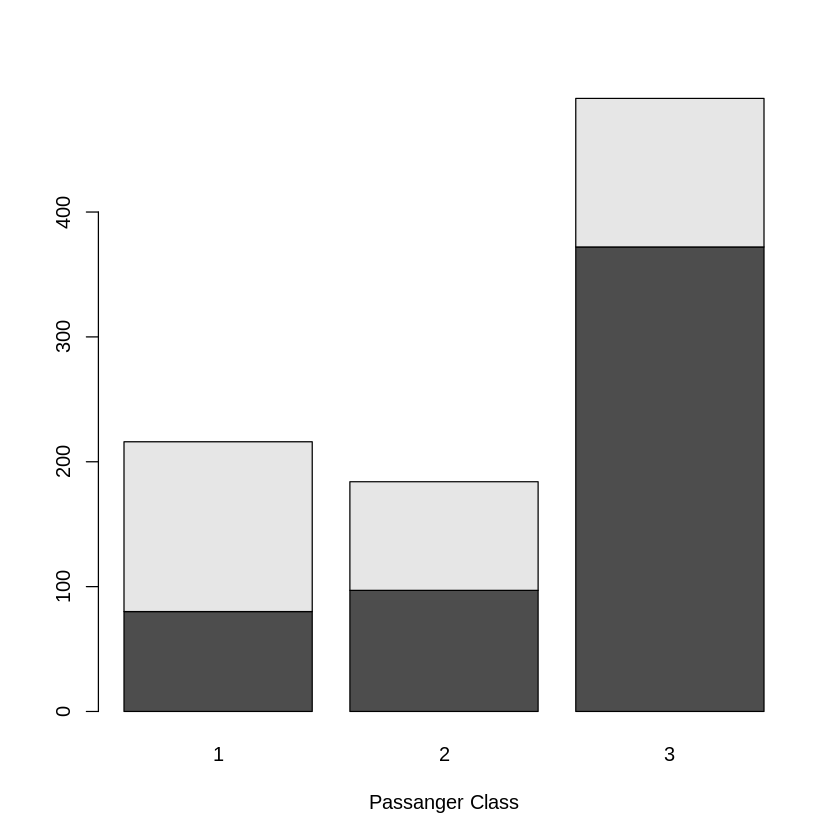

In [ ]:
barplot(table(train$Survived, train$Pclass), xlab = 'Passanger Class')

# Decesion Tree

In [ ]:
install.packages('tree')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tree)

In [ ]:
dec_tree <- tree(Survived ~ Sex + Pclass + Age, data = train)

Warning message in tree(Survived ~ Sex + Pclass + Age, data = train):
“NAs introduced by coercion”


In [ ]:
summary(dec_tree)


Regression tree:
tree(formula = Survived ~ Sex + Pclass + Age, data = train)
Variables actually used in tree construction:
[1] "Pclass" "Age"   
Number of terminal nodes:  6 
Residual mean deviance:  0.1944 = 137.6 / 708 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9143 -0.2092 -0.2092  0.0000  0.3904  0.7908 

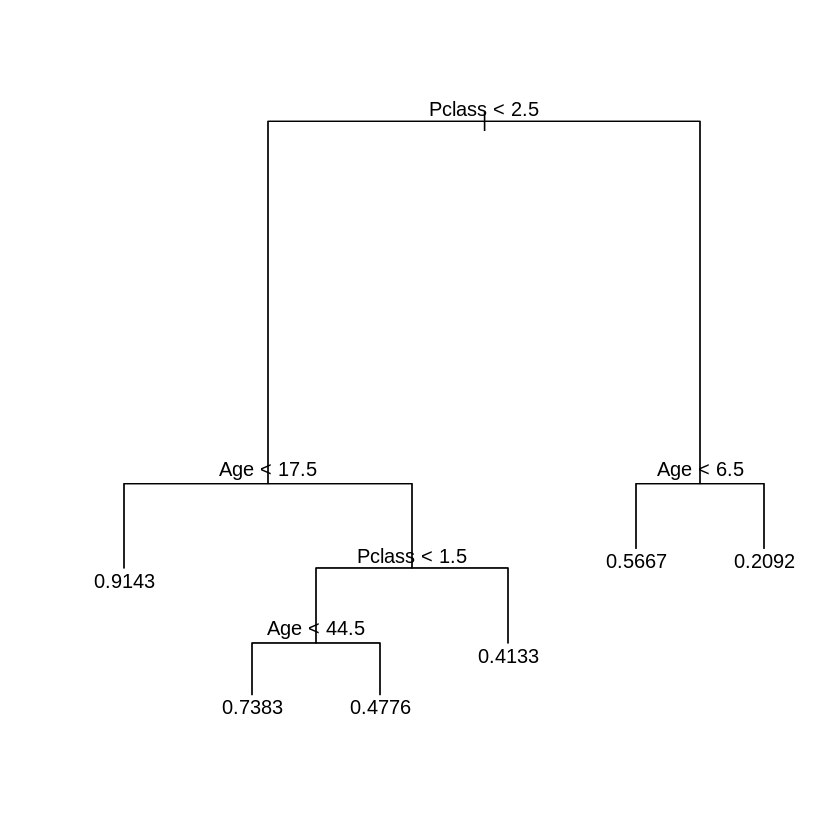

In [ ]:
plot(dec_tree)
text(dec_tree, pretty = 0)
#left side means yes
#right side means no

In [ ]:
print(dec_tree)

node), split, n, deviance, yval
      * denotes terminal node

 1) root 714 172.2000 0.40620  
   2) Sex: female 261  48.3100 0.75480  
     4) Pclass < 2.5 159   8.4910 0.94340 *
     5) Pclass > 2.5 102  25.3400 0.46080  
      10) Age < 38.5 90  22.4900 0.51110 *
      11) Age > 38.5 12   0.9167 0.08333 *
   3) Sex: male 453  73.9100 0.20530  
     6) Age < 6.5 24   5.3330 0.66670  
      12) Pclass < 2.5 10   0.0000 1.00000 *
      13) Pclass > 2.5 14   3.4290 0.42860 *
     7) Age > 6.5 429  63.1800 0.17950  
      14) Pclass < 1.5 99  23.4100 0.38380  
        28) Age < 53 77  19.0900 0.45450 *
        29) Age > 53 22   2.5910 0.13640 *
      15) Pclass > 1.5 330  34.3900 0.11820 *


In [ ]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "3"

$minor
[1] "6.1"

$year
[1] "2019"

$month
[1] "07"

$day
[1] "05"

$`svn rev`
[1] "76782"

$language
[1] "R"

$version.string
[1] "R version 3.6.1 (2019-07-05)"

$nickname
[1] "Action of the Toes"

# Logistic Regression

In [ ]:
logistic_1 <- glm(Survived ~ Sex + Pclass + Age, family = 'binomial', data = train)

In [ ]:
summary(logistic_1)


Call:
glm(formula = Survived ~ Sex + Pclass + Age, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7270  -0.6799  -0.3947   0.6483   2.4668  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.056006   0.502128  10.069  < 2e-16 ***
Sexmale     -2.522131   0.207283 -12.168  < 2e-16 ***
Pclass      -1.288545   0.139259  -9.253  < 2e-16 ***
Age         -0.036929   0.007628  -4.841 1.29e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 647.29  on 710  degrees of freedom
  (177 observations deleted due to missingness)
AIC: 655.29

Number of Fisher Scoring iterations: 5


In [ ]:
new <- data.frame(Sex = 'female', Pclass = 2, Age = 40)
predict(logistic_1, new, type = 'response')

1 
0.7314036

In [ ]:
sexmale = 0
pclass = 2
age = 40
value <- (exp(5.056006 - (2.522131)*(sexmale) - (1.288545)*(pclass) - 0.036929*(age))/(exp(5.056006 - (2.522131)*(sexmale) - (1.288545)*(pclass) - 0.036929*(age)) +1))
value

[1] 0.7314037

In [ ]:
library(devtools)

ERROR: Error in library(devtools): there is no package called 'devtools'


In [ ]:
pscl::pR2(logistic_1)['McFadden']

fitting null model for pseudo-r2


McFadden 
0.3288956

In [ ]:
new <- data.frame(Sex = female, )

ERROR: Error in data.frame(Sex = female, ): object 'female' not found


https://www.statology.org/logistic-regression-in-r/